In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

plt.style.use('ggplot')

In [2]:
#Data: MovieLens metadata through July 2017
#Source: https://www.kaggle.com/rounakbanik/the-movies-dataset
#Goal: Grab the top 50 animated films by revenue before July 2017

df = pd.read_csv('movies_metadata.csv')
pd.set_option('display.max_columns', 24)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [4]:
#Filter out adult, unreleased and non-animated films
criteria = (df['adult'] == 'False') & (df['status'] == 'Released') & (df['genres'].str.contains('Animation'))
df = df[criteria]


In [7]:
#Grab pertinent fields, sort by revenue, select top 50, reset index
df = df.loc[:,('imdb_id','title','release_date','revenue')]
df['revenue'] = df['revenue'].astype('int64')
df = df.sort_values('revenue', ascending = False)
df = df.iloc[0:50]
df = df.reset_index()
df

,index,imdb_id,title,release_date,revenue
0,0,tt2294629,Frozen,2013-11-27,1274219009
1,1,tt2293640,Minions,2015-06-17,1156730962
2,2,tt0435761,Toy Story 3,2010-06-16,1066969703
3,3,tt2277860,Finding Dory,2016-06-16,1028570889
4,4,tt2948356,Zootopia,2016-02-11,1023784195
5,5,tt3469046,Despicable Me 3,2017-06-15,1020063384
6,6,tt1690953,Despicable Me 2,2013-06-25,970761885
7,7,tt0266543,Finding Nemo,2003-05-30,940335536
8,8,tt0298148,Shrek 2,2004-05-19,919838758
9,9,tt1080016,Ice Age: Dawn of the Dinosaurs,2009-06-29,886686817


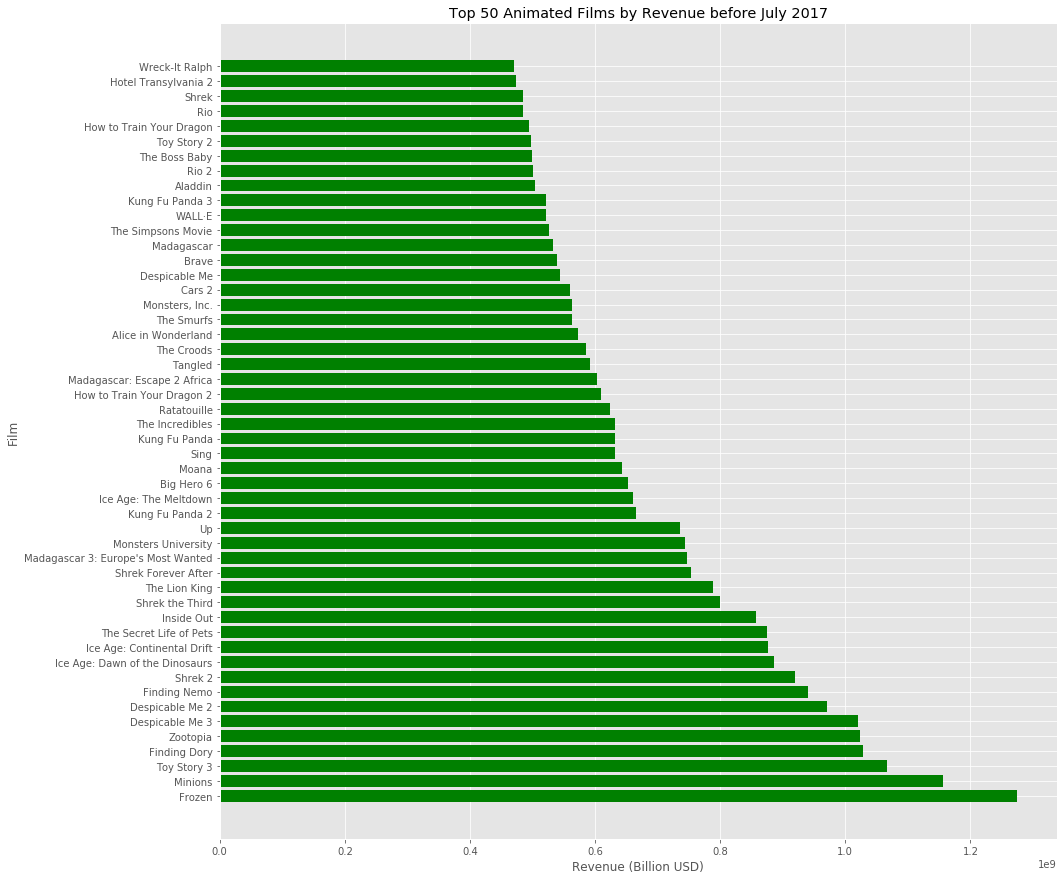

In [8]:
x = df.loc[:,'title']
y = df.loc[:,'revenue']

plt.barh(x,y, color = 'g')
plt.xlabel('Revenue (Billion USD)')
plt.ylabel('Film')
plt.title('Top 50 Animated Films by Revenue before July 2017')
plt.rcParams['figure.figsize'] = 15,15

plt.show()